In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#read csv files in data
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test= pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [ ]:
#only show train that has dtype=object
train.select_dtypes(include=['object']).columns

Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [ ]:
#convert data types where coluhmns have values yes and no to 1 and 0
train = train.replace({'yes': 1, 'no': 0})
test = test.replace({'yes': 1, 'no': 0})

In [ ]:
#make surre all yes and no are covnerted

train.select_dtypes(include=['object']).columns

Index(['product_type', 'sub_area', 'ecology'], dtype='object')

In [ ]:
#  Import the necessary libraries
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


In [ ]:

#Create an instance of LabelEncoder
lbl = OrdinalEncoder()

In [ ]:

#Create an instance of LabelEncoder
lbl = LabelEncoder()

In [ ]:
train['sub_area'].unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", ...,
       'Poselenie iMhajlovo-Jarcevskoe', 'Poselenie Mihajlovo-Jracevskoe',
       'Poselenie Mhiajlovo-Jarcevskoe'], dtype=object)

In [ ]:
#do label encoding for prodcut type as well
lbl.fit(list(train['product_type'].values) + list(test['product_type'].values))
train['product_type'] = lbl.transform(list(train['product_type'].values))
test['product_type'] = lbl.transform(list(test['product_type'].values))

In [ ]:
# #do label encoding for sub area type as well
# lbl.fit(list(train['sub_area'].values) + list(test['sub_area'].values))
# train['sub_area'] = lbl.transform(list(train['sub_area'].values))
# test['sub_area'] = lbl.transform(list(test['sub_area'].values))

In [ ]:
train.drop(columns=['sub_area'], inplace=True)
test.drop(columns=['sub_area'], inplace=True)

In [ ]:
X = train.drop(columns=['price_doc'])
y = train[['price_doc']]

In [ ]:
#save row id in a dataframe
row_id = test['row ID']
#drop it from test now
test = test.drop(columns=['row ID'])

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
#write code such that all rows are replaced by the first letter of current data
train['sub_area'] = train['sub_area'].str[:2]
test['sub_area'] = test['sub_area'].str[:2]
#and captialise them if not, else let them stay capitalized
train['sub_area'] = train['sub_area'].str.upper()
test['sub_area'] = test['sub_area'].str.upper()


In [ ]:

len(train['sub_area'].unique())

185

In [ ]:
# Perform one-hot encoding
train = pd.get_dummies(train, columns=['sub_area'])
test = pd.get_dummies(test, columns=['sub_area'])

# Get missing columns in the training test
missing_cols = set(train.columns) - set(test.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]


In [ ]:
train

In [ ]:
numerical_features = train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train.select_dtypes(include=['object']).columns
#Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[02
    ('ordinal', OrdinalEncoder())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
scaler = MinMaxScaler()

#Fit the scaler and transform X_new
X = scaler.fit_transform(train)


In [ ]:
test = scaler.fit_transform(test)

In [ ]:
X

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X)

In [ ]:
X_train_preprocessed

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
test

In [ ]:
X_test_preprocessed = preprocessor.transform(test)


In [ ]:
X_train_preprocessed.shape

(181507, 271)

In [ ]:
train.shape

(181507, 456)

In [ ]:
test.shape

(77789, 456)

In [ ]:
X_test_preprocessed.shape

(77789, 271)

In [ ]:
# Get the configuration of the model
config = model.get_config()

# Print the configuration
print(config)


{'name': 'sequential_8', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 271), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_9'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_32', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 271)}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_16', 'trainable': True, 

In [ ]:
# Define the neural network model with enhancements
model = keras.Sequential([
    layers.Input(shape=(X_train_preprocessed.shape[1],)),  # Input layer
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    layers.BatchNormalization(),  # Batch Normalization layer
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),  # Additional hidden layer
    layers.BatchNormalization(),  # Batch Normalization layer
    layers.Dropout(0.3),  # Dropout layer to prevent overfitting
    layers.Dense(32, activation='relu'),  # Additional hidden layer
    layers.Dropout(0.3),  # Dropout layer to prevent overfitting
    layers.Dense(16, activation='relu'),  # Additional hidden layer
    layers.Dense(1)  # Output layer with 1 unit (regression problem)
])
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model with a lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss='mean_squared_error')
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001), loss='mean_squared_error')

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the neural network model with enhancements
history = model.fit(X_train_preprocessed, y, epochs=30, batch_size=32,
                    callbacks=[early_stopping])

# Plot training history (optional)
import matplotlib.pyplot as plt

# Assuming 'history' is the object containing training history

# Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()


# Make predictions on the validation set
# X_valid_preprocessed = preprocessor.transform(X_test)
# y_pred = model.predict(X_valid_preprocessed)

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error on Validation Set: {mse}')
# Evaluate the model
# mse = model.evaluate(X_test, y_test)
# rmse = np.sqrt(mse)
# print("Root Mean squared error: %.2f" % rmse)

# Now, make predictions on the test set
# X_test_preprocessed = preprocessor.transform(test)
price_doc = model.predict(X_test_preprocessed)

# Save predictions to a CSV file
# submission_df = pd.DataFrame({'row ID': range(1, len(test_predictions) + 1), 'price_doc': test_predictions.flatten()})

# submission_df.to_csv('/content/drive/MyDrive/Data/neural network.csv', index=False)

# Print the number of features used after preprocessing
num_features_used = X_train_preprocessed.shape[1]
print(f'Number of Features Used: {num_features_used}')

In [ ]:
  price_doc

array([[7682536.5],
       [9466693. ],
       [5560998. ],
       ...,
       [4102324.2],
       [4102324.2],
       [4102324.2]], dtype=float32)

In [ ]:
# Use L2 regularization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))  # Output layer

In [ ]:
X.shape

(181507, 270)

In [ ]:
# Compile the model with adjusted learning rate
from tensorflow.keras.optimizers import Adam

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_test, y_test))

In [ ]:
# Print the training and validation loss
print(history.history.keys())  # To see what's available in the history object

# Print training loss
print(history.history['loss'])

# Print validation loss
print(history.history['val_loss'])

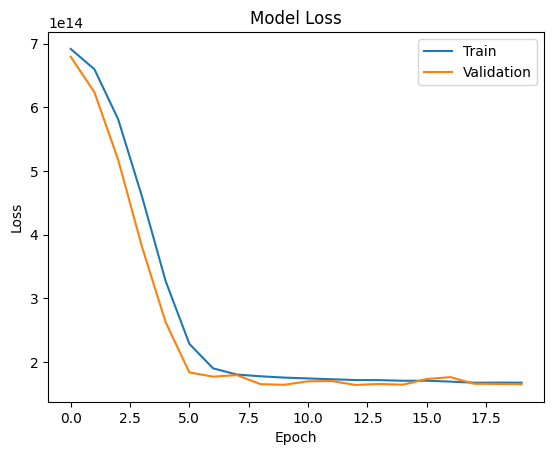

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object containing training history

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print("Root Mean squared error: %.2f" % rmse)

1702/1702 [==============================] - 3s 2ms/step - loss: 165298762153984.0000
Root Mean squared error: 12856856.62


In [ ]:
# Predict on the test set
price_doc = model.predict(test).flatten()

2431/2431 [==============================] - 5s 2ms/step


In [ ]:
#Create a DataFrame for the predictions
predictions_df = pd.DataFrame(price_doc, columns=['price_doc'])

#Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'row ID', row_id)

#Save the predictions to a CSV file
predictions_df.to_csv('downloadme.csv', index=False)